In [30]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('ten.png',0)

#img = cv.medianBlur(img,5)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,7,5)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,7,5)


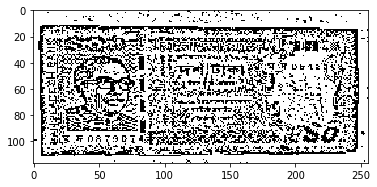

In [31]:
plt.imshow(th2,cmap='gray')


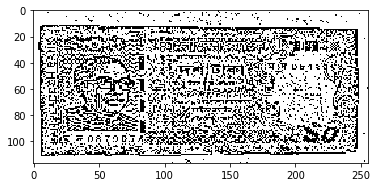

In [32]:
plt.imshow(th3,cmap='gray')


In [64]:
#noise removal
def noise_removal(image):
    kernel=np.ones((1,1),np.uint8)
    image = cv.dilate(image,kernel,iterations=1)
    kernel=np.ones((1,1),np.uint8)
    image=cv.erode(image,kernel,iterations=1)
    image=cv.morphologyEx(image,cv.MORPH_CLOSE,kernel)
    image=cv.medianBlur(image,3)
    return (image)

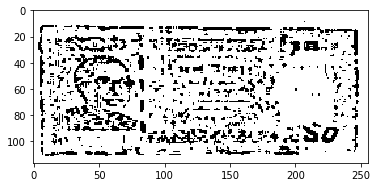

In [66]:
th3=noise_removal(th3)
plt.imshow(th3,cmap='gray')

In [67]:
#erosion
def thin_font(img):
    import numpy as np
    img=cv.bitwise_not(img)
    kernel=np.ones((2,2),np.uint8)
    img=cv.erode(img,kernel,iterations=1)
    img=cv.dilate(img,kernel,iterations=1)
    
    img=cv.bitwise_not(img)
    return (img)

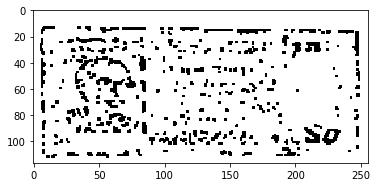

In [68]:
eroded_img=thin_font(th3)
plt.imshow(eroded_img,cmap='gray')

In [69]:
thres,im_bw=cv.threshold(th3,20,200,cv.THRESH_BINARY+cv.THRESH_OTSU)
#cv2.imwrite('bw_image.png',im_bw)

#thres,im_bw=cv2.threshold(im_bw,120,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)


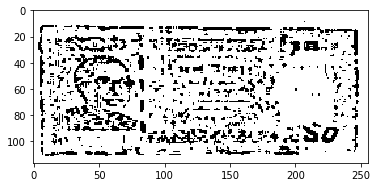

In [70]:
plt.imshow(im_bw,cmap='gray')

In [71]:
import pytesseract as pt

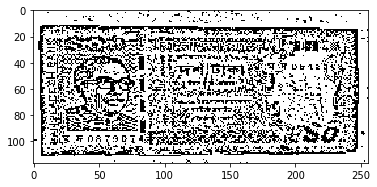

In [72]:
print(pt.image_to_string(eroded_img,lang='ben'))
plt.imshow(th2,cmap='gray')